In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=1e493428578956df7ac9d0f882904c40e3093102166e116d6cb40f0cda86d806
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from apyori import apriori
from skimage.io import imread
from skimage.transform import resize
from time import time


In [49]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
df = pd.read_csv('Trade_Data_Normalization_v7.csv', sep=',') 
df.head(10)

,0,1,2,3,4,5,6
0,LINEAR IC,LOGIC IC,MEMORY_EMBEDED,NaN,NaN,NaN,NaN
1,CPU / MPU,DISCRETE,LINEAR IC,PEMCO,NaN,NaN,NaN
2,CHIPSET / ASP,CPU / MPU,LINEAR IC,NaN,NaN,NaN,NaN
3,DISCRETE,LINEAR IC,OPTICAL AND SENSOR,NaN,NaN,NaN,NaN
4,CHIPSET / ASP,DISCRETE,LINEAR IC,MEMORY_SYSTEM,NaN,NaN,NaN
5,CPU / MPU,LOGIC IC,MEMORY_EMBEDED,NaN,NaN,NaN,NaN
6,OTHERS,PEMCO,NaN,NaN,NaN,NaN,NaN
7,DISCRETE,MEMORY_SYSTEM,NaN,NaN,NaN,NaN,NaN
8,PEMCO,NaN,NaN,NaN,NaN,NaN,NaN
9,LINEAR IC,MEMORY_EMBEDED,OTHERS,NaN,NaN,NaN,NaN


In [50]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)


{nan, 'PEMCO', 'MEMORY_EMBEDED', 'LOGIC IC', 'OPTICAL AND SENSOR', 'OTHERS', 'LINEAR IC', 'CHIPSET / ASP', 'CPU / MPU', 'MEMORY_SYSTEM', 'DISCRETE'}


In [51]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [70]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
x=[]
y=[]
z=[]
st=[]
setItem=[]
# import time
for xA in range(1,10):
    for xB in range(1,10):
        timeStart=time.time()
        freq_items = apriori(ohe_df, min_support=xA/10, use_colnames=True, verbose=1,low_memory=False)
        rules = association_rules(freq_items, metric="confidence", min_threshold=xB/10)
        timeFinish=time.time()
        association_results = list(rules)
        if(len(association_results)>0):
            lData=[xA/10,xB/10,len(association_results),(timeFinish - timeStart)]
            x.append(xA/10)
            y.append(xB/10)
            st.append(timeFinish - timeStart)
            z.append(len(association_results))
            aRule=[]
            for ar in association_results:
                aRule.append(list(ar.items))
            item=[xA/10,xB/10,aRule]
            setItem.append(item)
# support= input("請輸入支持度:")
# print("您輸入的支持度為:"+support)
# confidence= input("請輸入信心度:")
# print("您輸入的信心度為:"+confidence)
# item= input("請輸入商品類型(PRODUCT_TYPE，若有多項請以「,」分開):")
# print("您輸入的商品類型為:"+item)
# RProductList=[]
# RProduct=""
# for si in setItem:
#     if(si[0]==float(support)):
#         if(si[1]==float(confidence)):
#             RProductList=si[2]
# inputItem=item.split(',')
# inputItemList=[]
# for ii in range(0,len(inputItem)):
#     isSave=False
#     if(inputItemList!=[]):
#         for iil in range(0,len(inputItemList)):
#             if(inputItem[ii]==inputItemList[iil]):
#                 isSave=True
#                 break
#     if(isSave ==False):
#         inputItemList.append(inputItem[ii])
# print("==============================")
# print("為您推薦以下商品類型:")
# chkMax=len(inputItemList)
# chkTime=0
# itemSet=[]
# for x in RProductList:
#     if(len(x)>chkMax):
#         for i in range(0,len(inputItemList)):
#             if inputItemList[i] in x:
#                 chkTime=chkTime+1
#         if(chkTime==chkMax):
#             for xi in range(0,len(x)):
#                 itemSet.append(x[xi])
# itemSetList=[]
# for i in range(0,len(itemSet)):
#     isSave=False
#     for isl in range(0,len(itemSetList)):
#         if(itemSet[i]==itemSetList[isl]):
#             isSave=True
#             break
#     if(isSave==False):
#         itemSetList.append(itemSet[i])
# print(itemSetList)
     

您輸入的支持度為:0.1
您輸入的信心度為:0.1
您輸入的商品類型為:MEMORY_SYSTEM


TypeError: 'float' object is not subscriptable

In [ ]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1) 
freq_items.head(7)
rules= association_rules (freq_items, metric="confidence", min_threshold=0.6) 
rules.head()

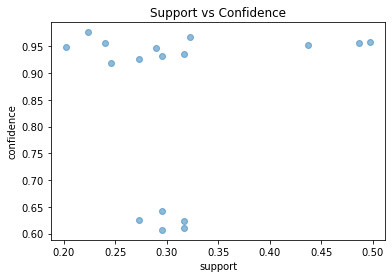

In [46]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

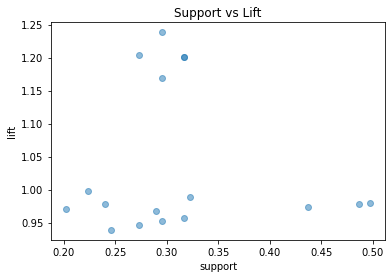

In [47]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

Text(0.5, 1.0, 'Lift vs Confidence')

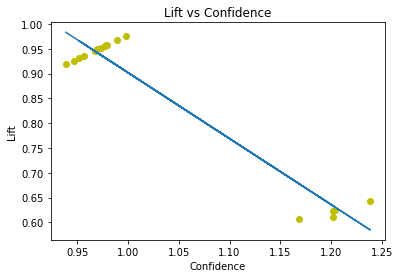

In [48]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence')